In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = '/content/drive/MyDrive/딥러닝/data/house_train.csv'

pd.read_csv(path)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
df = pd.read_csv(path)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
#결측치 확인
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
df.isna().sum().sort_values(ascending=False).head(20)


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
dtype: int64

In [8]:
#object >> 범주형(category) 데이터 처리
#0, 1로 변환 >> one-hot 인코딩

pd.get_dummies(df)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,False,False,False,True,False,False,False,False,True,False
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,False,False,False,True,False,False,False,False,True,False
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,False,False,False,True,False,False,False,False,True,False
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,False,False,False,True,False,False,False,False,True,False


In [9]:
df = pd.get_dummies(df)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,True,False,False,False,False,True,False


In [10]:
#결측치 처리 (평균값으로 대체)

df.mean()

Id                         730.500000
MSSubClass                  56.897260
LotFrontage                 70.049958
LotArea                  10516.828082
OverallQual                  6.099315
                             ...     
SaleCondition_AdjLand        0.002740
SaleCondition_Alloca         0.008219
SaleCondition_Family         0.013699
SaleCondition_Normal         0.820548
SaleCondition_Partial        0.085616
Length: 289, dtype: float64

In [11]:
df.fillna(df.mean(), inplace=True)

In [12]:
df.isna().sum().sort_values(ascending=False).head(20)


Id                    0
Exterior1st_Stucco    0
BsmtFinType1_GLQ      0
BsmtFinType1_BLQ      0
BsmtFinType1_ALQ      0
BsmtExposure_No       0
BsmtExposure_Mn       0
BsmtExposure_Gd       0
BsmtExposure_Av       0
BsmtCond_TA           0
BsmtCond_Po           0
BsmtCond_Gd           0
BsmtCond_Fa           0
BsmtQual_TA           0
BsmtQual_Gd           0
BsmtQual_Fa           0
BsmtQual_Ex           0
BsmtFinType1_LwQ      0
BsmtFinType1_Rec      0
BsmtFinType1_Unf      0
dtype: int64

In [13]:
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050199,-0.005024,...,-0.020738,-0.018998,0.038920,0.026133,0.007009,-0.034852,-0.009018,0.004865,0.015881,-0.020738
MSSubClass,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,...,0.014005,-0.045156,-0.014555,0.026359,0.005003,0.016241,0.030002,0.000983,0.024359,-0.051068
LotFrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,...,-0.051787,0.126580,-0.023461,-0.089928,-0.021846,-0.037020,-0.018090,0.015818,-0.072074,0.124842
LotArea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,...,-0.015040,0.020039,-0.005722,-0.002292,-0.029126,-0.013208,0.008966,-0.010781,0.005711,0.022635
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,...,-0.021172,0.327412,-0.057962,-0.225013,-0.103535,-0.041677,-0.044950,-0.025515,-0.143282,0.323295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,-0.034852,0.016241,-0.037020,-0.013208,-0.041677,-0.038888,-0.045601,-0.040294,-0.011959,-0.014874,...,-0.003073,-0.015827,-0.002378,0.020457,-0.014289,1.000000,-0.004772,-0.006177,-0.112080,-0.016038
SaleCondition_Alloca,-0.009018,0.030002,-0.018090,0.008966,-0.044950,-0.033444,-0.010104,-0.020727,-0.009689,0.021369,...,-0.005337,-0.027489,-0.004131,0.035530,-0.024817,-0.004772,1.000000,-0.010729,-0.194663,-0.027856
SaleCondition_Family,0.004865,0.000983,0.015818,-0.010781,-0.025515,-0.023873,-0.035785,-0.048056,-0.009914,0.000765,...,-0.006909,-0.035587,-0.005348,0.028599,-0.032128,-0.006177,-0.010729,1.000000,-0.252006,-0.036062
SaleCondition_Normal,0.015881,0.024359,-0.072074,0.005711,-0.143282,0.161642,-0.158427,-0.120577,-0.084241,-0.019560,...,0.027414,-0.645698,-0.097031,0.634322,-0.582947,-0.112080,-0.194663,-0.252006,1.000000,-0.654323


In [14]:
df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=289)

In [15]:
df_corr = df.corr()
df_corr = abs(df_corr)
df_corr
#집값과 관련도가 큰 순서대로 저장
# df_corr.sort_values('SalePrice', ascending=False)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,1.000000,0.011156,0.009601,0.033226,0.028365,0.012609,0.012713,0.021998,0.050199,0.005024,...,0.020738,0.018998,0.038920,0.026133,0.007009,0.034852,0.009018,0.004865,0.015881,0.020738
MSSubClass,0.011156,1.000000,0.357056,0.139781,0.032628,0.059316,0.027850,0.040581,0.022895,0.069836,...,0.014005,0.045156,0.014555,0.026359,0.005003,0.016241,0.030002,0.000983,0.024359,0.051068
LotFrontage,0.009601,0.357056,1.000000,0.306795,0.234196,0.052820,0.117598,0.082746,0.179283,0.215828,...,0.051787,0.126580,0.023461,0.089928,0.021846,0.037020,0.018090,0.015818,0.072074,0.124842
LotArea,0.033226,0.139781,0.306795,1.000000,0.105806,0.005636,0.014228,0.013788,0.103960,0.214103,...,0.015040,0.020039,0.005722,0.002292,0.029126,0.013208,0.008966,0.010781,0.005711,0.022635
OverallQual,0.028365,0.032628,0.234196,0.105806,1.000000,0.091932,0.572323,0.550684,0.410238,0.239666,...,0.021172,0.327412,0.057962,0.225013,0.103535,0.041677,0.044950,0.025515,0.143282,0.323295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,0.034852,0.016241,0.037020,0.013208,0.041677,0.038888,0.045601,0.040294,0.011959,0.014874,...,0.003073,0.015827,0.002378,0.020457,0.014289,1.000000,0.004772,0.006177,0.112080,0.016038
SaleCondition_Alloca,0.009018,0.030002,0.018090,0.008966,0.044950,0.033444,0.010104,0.020727,0.009689,0.021369,...,0.005337,0.027489,0.004131,0.035530,0.024817,0.004772,1.000000,0.010729,0.194663,0.027856
SaleCondition_Family,0.004865,0.000983,0.015818,0.010781,0.025515,0.023873,0.035785,0.048056,0.009914,0.000765,...,0.006909,0.035587,0.005348,0.028599,0.032128,0.006177,0.010729,1.000000,0.252006,0.036062
SaleCondition_Normal,0.015881,0.024359,0.072074,0.005711,0.143282,0.161642,0.158427,0.120577,0.084241,0.019560,...,0.027414,0.645698,0.097031,0.634322,0.582947,0.112080,0.194663,0.252006,1.000000,0.654323


In [16]:
df_corr_sort = df_corr.sort_values('SalePrice', ascending=False)
df_corr_sort

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
SalePrice,0.021917,0.084284,3.349009e-01,0.263843,0.790982,0.077856,0.522897,0.507101,0.475241,0.386420,...,0.027475,0.357509,0.034895,0.242598,0.118069,0.050686,0.015525,0.046480,0.153990,0.352060
OverallQual,0.028365,0.032628,2.341962e-01,0.105806,1.000000,0.091932,0.572323,0.550684,0.410238,0.239666,...,0.021172,0.327412,0.057962,0.225013,0.103535,0.041677,0.044950,0.025515,0.143282,0.323295
GrLivArea,0.008273,0.074853,3.683920e-01,0.263116,0.593007,0.079686,0.199010,0.287389,0.389893,0.208171,...,0.022348,0.168368,0.036522,0.121102,0.041173,0.040208,0.032283,0.007743,0.091572,0.163239
GarageCars,0.016570,0.040110,2.697289e-01,0.154871,0.600671,0.185758,0.537850,0.420622,0.363778,0.224054,...,0.044502,0.286290,0.087089,0.197458,0.110124,0.106443,0.028378,0.010589,0.121886,0.282164
GarageArea,0.017634,0.098672,3.236629e-01,0.180403,0.562022,0.151521,0.478954,0.371600,0.372567,0.296970,...,0.041904,0.296671,0.080601,0.218665,0.096837,0.101277,0.005458,0.016173,0.130874,0.294714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Foundation_Wood,0.007447,0.003824,6.657112e-02,0.008896,0.018621,0.003725,0.028654,0.026679,0.026065,0.034637,...,0.002660,0.013702,0.002059,0.017710,0.012370,0.002378,0.004131,0.005348,0.021220,0.013885
GarageCond_Gd,0.009042,0.000429,9.240942e-03,0.006288,0.011987,0.053664,0.024465,0.032560,0.003579,0.002672,...,0.004617,0.023782,0.003574,0.030738,0.013014,0.004128,0.089753,0.009282,0.008778,0.024099
RoofStyle_Mansard,0.029043,0.012128,3.902477e-02,0.003977,0.004986,0.035410,0.059730,0.001951,0.011107,0.048464,...,0.004069,0.020959,0.003150,0.027090,0.018922,0.003638,0.006319,0.008180,0.032459,0.021239
RoofMatl_Metal,0.037860,0.014303,9.409926e-17,0.028695,0.001881,0.013540,0.001966,0.020126,0.015038,0.028386,...,0.001535,0.007905,0.001188,0.010218,0.007137,0.001372,0.002383,0.003085,0.012243,0.008011


In [17]:
df_corr_sort['SalePrice'][:10]

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
ExterQual_TA    0.589044
FullBath        0.560664
BsmtQual_Ex     0.553105
Name: SalePrice, dtype: float64

In [18]:
df_corr_sort['SalePrice'][:10].index


Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'ExterQual_TA', 'FullBath', 'BsmtQual_Ex'],
      dtype='object')

In [19]:
#리스트로 담음
list(df_corr_sort['SalePrice'][:10].index)

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'ExterQual_TA',
 'FullBath',
 'BsmtQual_Ex']

In [20]:
cols = list(abs(df_corr_sort['SalePrice'][:10]).index)
df[cols]

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,ExterQual_TA,FullBath,BsmtQual_Ex
0,208500,7,1710,2,548,856,856,False,2,False
1,181500,6,1262,2,460,1262,1262,True,2,False
2,223500,7,1786,2,608,920,920,False,2,False
3,140000,7,1717,3,642,756,961,True,1,False
4,250000,8,2198,3,836,1145,1145,False,2,False
...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,2,460,953,953,True,2,False
1456,210000,6,2073,2,500,1542,2073,True,2,False
1457,266500,7,2340,1,252,1152,1188,False,2,False
1458,142125,5,1078,1,240,1078,1078,True,1,False


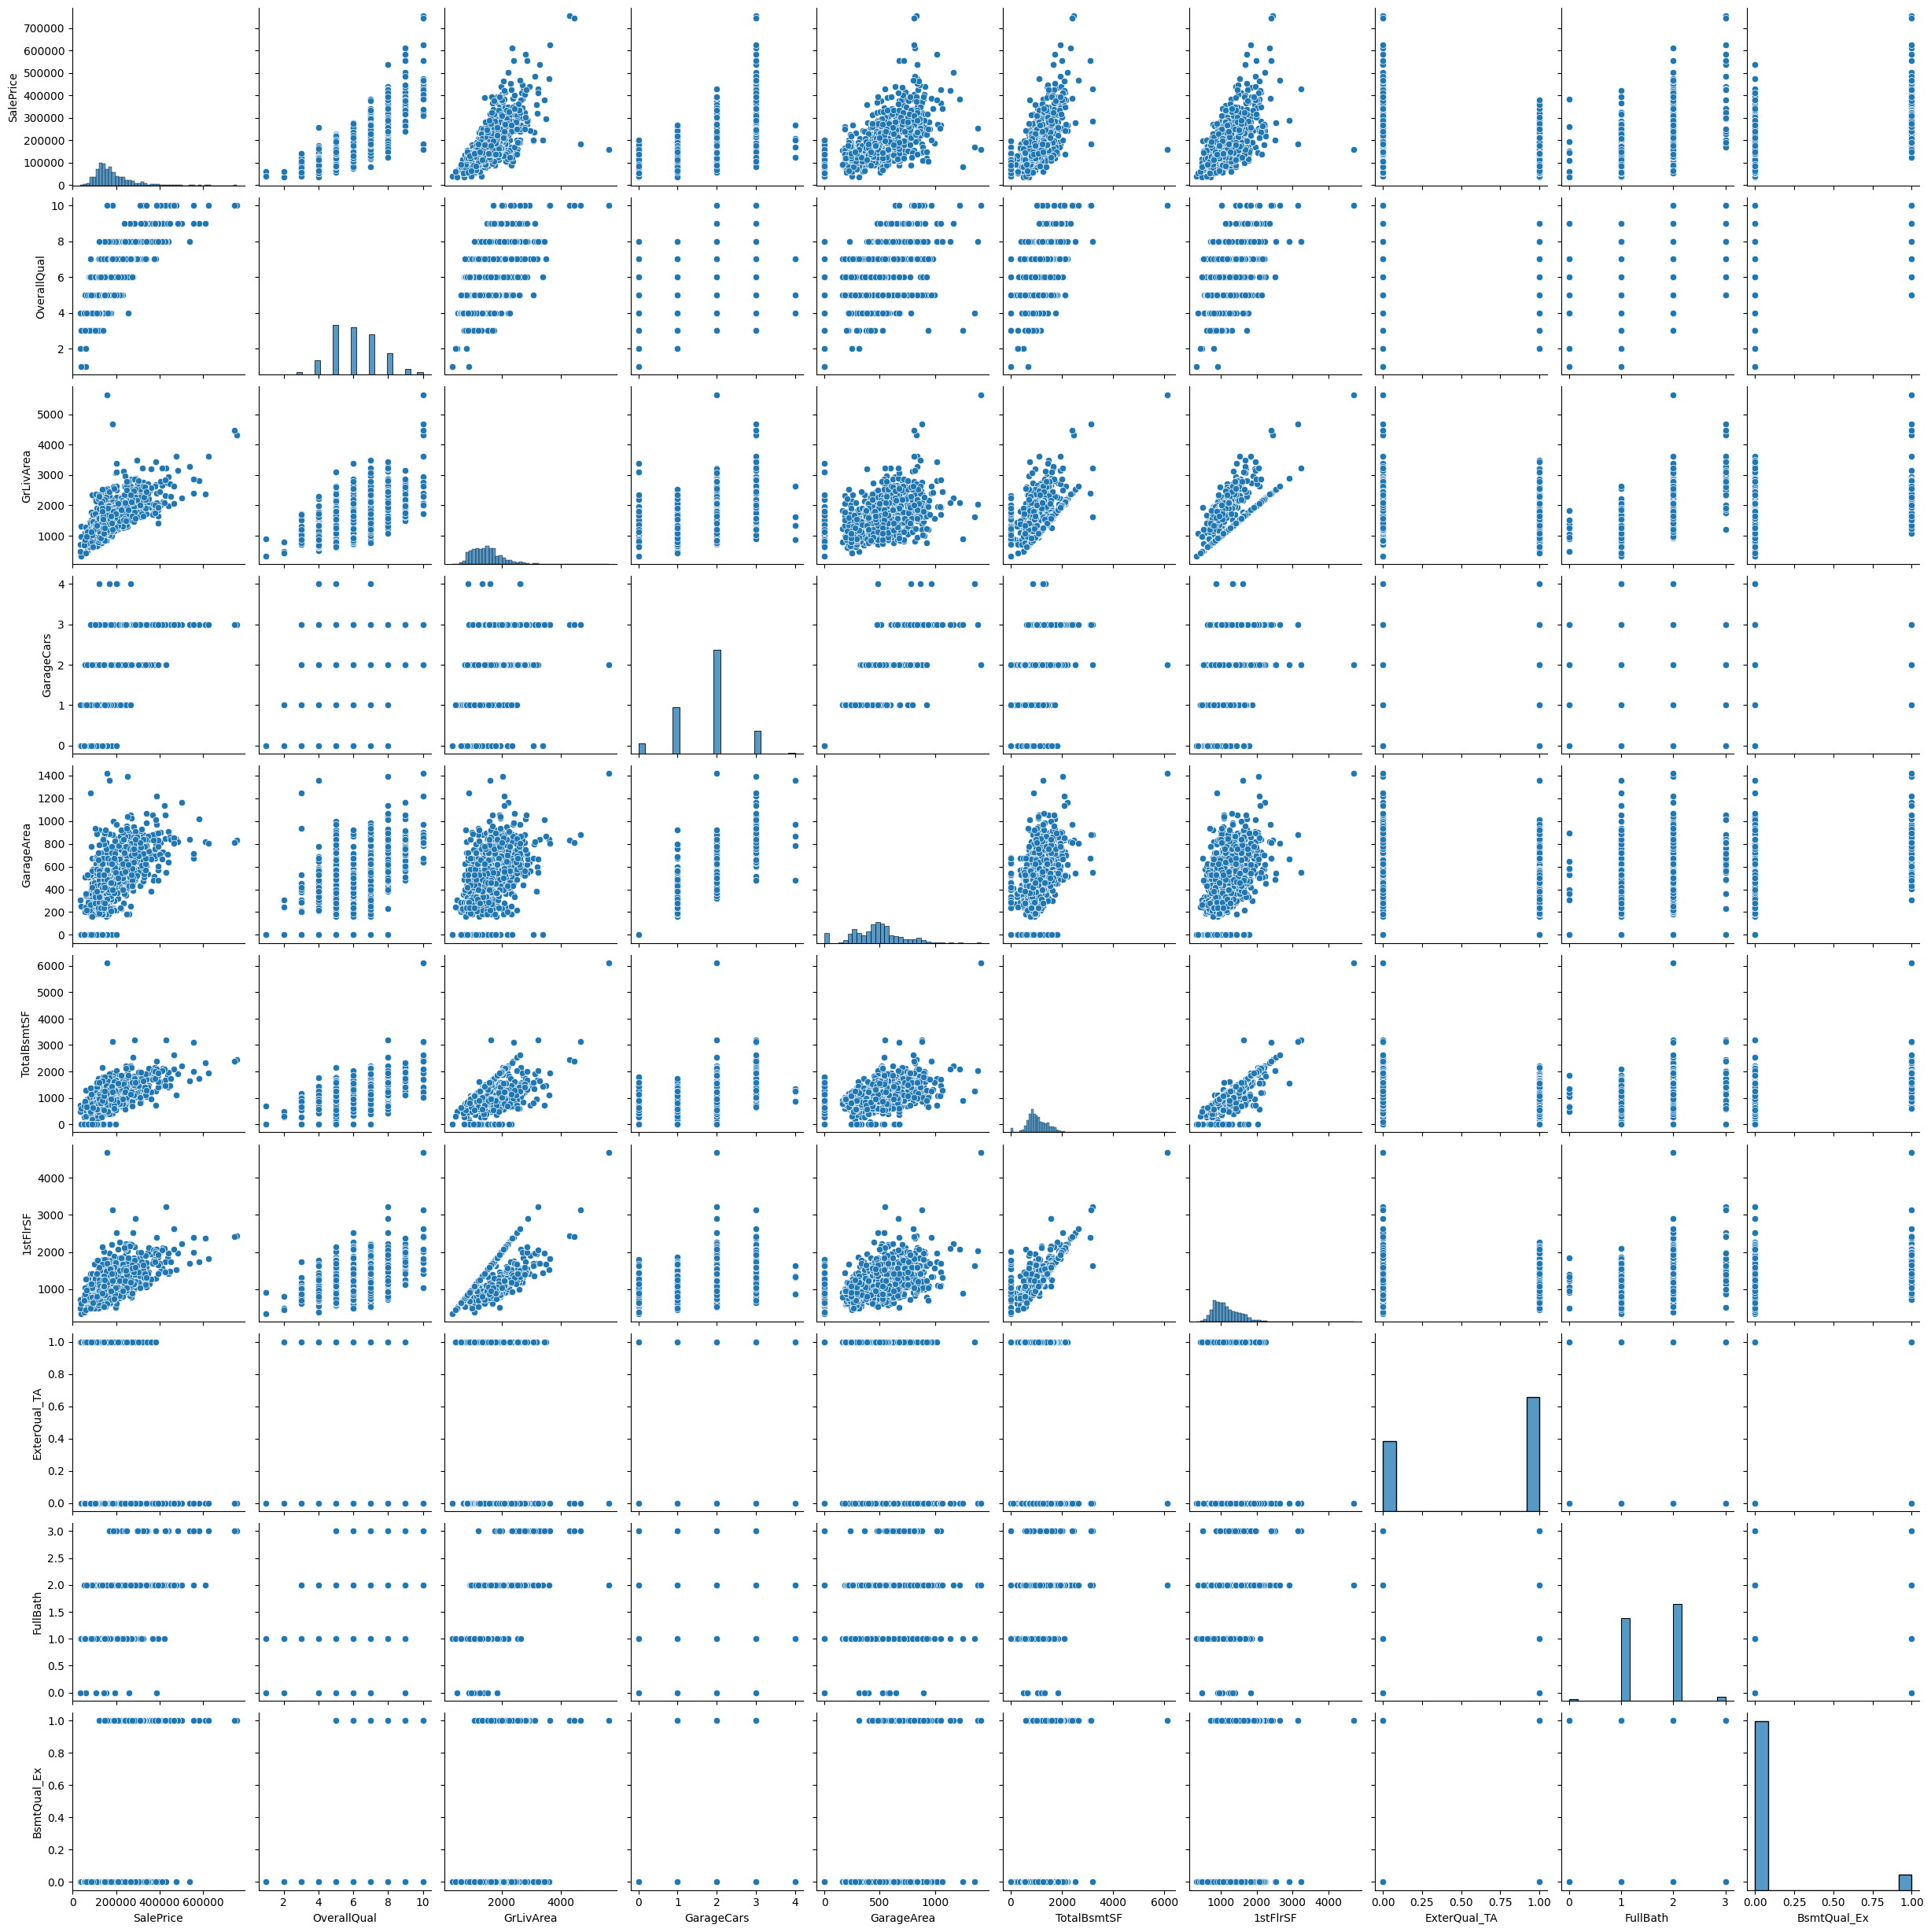

In [21]:
sns.pairplot(df[cols])
plt.show()

In [32]:
#주택 가격 예측
#집값(SalePrice)제외, 속성정보만 추출

# x = 속성, y = 집값(SalePrice)

x = df[cols].iloc[:, 1:].astype('float32')
y = df['SalePrice'].values.astype('float32')

print(x[:5])
print()
print(y[:5])

   OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
0          7.0     1710.0         2.0       548.0        856.0     856.0   
1          6.0     1262.0         2.0       460.0       1262.0    1262.0   
2          7.0     1786.0         2.0       608.0        920.0     920.0   
3          7.0     1717.0         3.0       642.0        756.0     961.0   
4          8.0     2198.0         3.0       836.0       1145.0    1145.0   

   ExterQual_TA  FullBath  BsmtQual_Ex  
0           0.0       2.0          0.0  
1           1.0       2.0          0.0  
2           0.0       2.0          0.0  
3           1.0       1.0          0.0  
4           0.0       2.0          0.0  

[208500. 181500. 223500. 140000. 250000.]


In [ ]:
#크기가 안맞을때
# min_samples = min(len(x_train), len(y))
# min_samples
# x_train = x_train[:min_samples]
# y = y[:min_samples]

In [33]:
#모델 구축 (학습셋, 테스트 셋 구분)
x_train, x_test, y_train, y_test = \
train_test_split(x, y , test_size=0.2, random_state=42)

In [34]:
x_train.shape # 9개의 변수

(1168, 9)

In [35]:
y_train.shape

(1168,)

In [36]:
#딥러닝 모델 구조 설정
model = Sequential()
model.add(Dense(10, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1)) #예측모델

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                100       
                                                                 
 dense_5 (Dense)             (None, 30)                330       
                                                                 
 dense_6 (Dense)             (None, 40)                1240      
                                                                 
 dense_7 (Dense)             (None, 1)                 41        
                                                                 
Total params: 1711 (6.68 KB)
Trainable params: 1711 (6.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
#모델 실행
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

#조기 종료
early_stopping = EarlyStopping(monitor='val_loss', patience=20)

# 모델 이름 정하기
modelpath = '/content/drive/MyDrive/딥러닝/data/model/house.hdf5'

#최적화 모델 업데이트 >> 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)


In [38]:
#모델 학습
model.fit(x_train, y_train, validation_split=0.25, epochs=2000,
          batch_size = 32, callbacks=[early_stopping, checkpointer])

Epoch 1/2000
22/28 [======================>.......] - ETA: 0s - loss: 39372152832.0000 - accuracy: 0.0000e+00
Epoch 1: val_loss improved from inf to 37386268672.00000, saving model to /content/drive/MyDrive/딥러닝/data/model/house.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


28/28 [==============================] - 2s 27ms/step - loss: 39133310976.0000 - accuracy: 0.0000e+00 - val_loss: 37386268672.0000 - val_accuracy: 0.0000e+00
Epoch 2/2000
25/28 [=========================>....] - ETA: 0s - loss: 38953328640.0000 - accuracy: 0.0000e+00
Epoch 2: val_loss improved from 37386268672.00000 to 36619182080.00000, saving model to /content/drive/MyDrive/딥러닝/data/model/house.hdf5
28/28 [==============================] - 0s 9ms/step - loss: 38604087296.0000 - accuracy: 0.0000e+00 - val_loss: 36619182080.0000 - val_accuracy: 0.0000e+00
Epoch 3/2000
23/28 [=======================>......] - ETA: 0s - loss: 37965049856.0000 - accuracy: 0.0000e+00
Epoch 3: val_loss improved from 36619182080.00000 to 34874810368.00000, saving model to /content/drive/MyDrive/딥러닝/data/model/house.hdf5
28/28 [==============================] - 0s 10ms/step - loss: 37412294656.0000 - accuracy: 0.0000e+00 - val_loss: 34874810368.0000 - val_accuracy: 0.0000e+00
Epoch 4/2000
20/28 [===

In [39]:
model.predict(x_test)

10/10 [==============================] - 0s 2ms/step


array([[131351.   ],
       [297469.6  ],
       [135514.25 ],
       [184759.39 ],
       [262437.56 ],
       [ 63168.957],
       [194007.52 ],
       [169500.95 ],
       [ 63168.957],
       [145218.53 ],
       [147667.44 ],
       [113565.44 ],
       [219271.3  ],
       [207526.67 ],
       [188063.45 ],
       [122881.03 ],
       [191051.39 ],
       [128518.375],
       [130277.59 ],
       [204705.   ],
       [185785.19 ],
       [206406.52 ],
       [181879.36 ],
       [121848.38 ],
       [212985.08 ],
       [176216.05 ],
       [176456.62 ],
       [124409.01 ],
       [184001.12 ],
       [187729.39 ],
       [147530.12 ],
       [261850.   ],
       [244166.11 ],
       [120067.9  ],
       [254071.28 ],
       [149424.27 ],
       [185497.6  ],
       [203614.94 ],
       [294890.94 ],
       [ 70720.336],
       [158948.62 ],
       [214093.44 ],
       [120688.21 ],
       [349570.38 ],
       [155075.8  ],
       [191468.78 ],
       [117664.54 ],
       [13173

In [40]:
model.predict(x_test).shape


10/10 [==============================] - 0s 2ms/step


(292, 1)

In [41]:
model.predict(x_test).flatten() # 2차원 >> 1차원


10/10 [==============================] - 0s 2ms/step


array([131351.   , 297469.6  , 135514.25 , 184759.39 , 262437.56 ,
        63168.957, 194007.52 , 169500.95 ,  63168.957, 145218.53 ,
       147667.44 , 113565.44 , 219271.3  , 207526.67 , 188063.45 ,
       122881.03 , 191051.39 , 128518.375, 130277.59 , 204705.   ,
       185785.19 , 206406.52 , 181879.36 , 121848.38 , 212985.08 ,
       176216.05 , 176456.62 , 124409.01 , 184001.12 , 187729.39 ,
       147530.12 , 261850.   , 244166.11 , 120067.9  , 254071.28 ,
       149424.27 , 185497.6  , 203614.94 , 294890.94 ,  70720.336,
       158948.62 , 214093.44 , 120688.21 , 349570.38 , 155075.8  ,
       191468.78 , 117664.54 , 131735.31 , 302032.22 , 158111.6  ,
       117319.34 , 225079.19 , 120764.14 , 277367.   , 131747.7  ,
       240033.48 , 183247.03 , 165249.25 , 174012.06 ,  76915.21 ,
        75379.55 , 151851.98 , 295276.4  , 214409.64 , 252087.83 ,
       213850.75 , 115332.53 , 278004.88 ,  97931.47 , 166019.2  ,
       112549.34 , 134706.08 , 122432.08 ,  85083.766, 318976.

In [42]:
# 예측값, 실제값 실행

real_price = []
pred_price = []
x_num = []

#임의로 40개 뽑아서 , 실제값(y_real), 예측값(y_pred)출력
n_iter = 0

y_pred = model.predict(x_test).flatten()
for i in range(40):
    real = y_test[i]
    pred = y_pred[i]
    print('실제가격 : {: .2f}, 예측가격 : {: .2f}'.format(real,pred))
    real_price.append(real)
    pred_price.append(pred)
    n_iter += 1
    x_num.append(n_iter)

10/10 [==============================] - 0s 2ms/step
실제가격 :  154500.00, 예측가격 :  131351.00
실제가격 :  325000.00, 예측가격 :  297469.59
실제가격 :  115000.00, 예측가격 :  135514.25
실제가격 :  159000.00, 예측가격 :  184759.39
실제가격 :  315500.00, 예측가격 :  262437.56
실제가격 :  75500.00, 예측가격 :  63168.96
실제가격 :  311500.00, 예측가격 :  194007.52
실제가격 :  146000.00, 예측가격 :  169500.95
실제가격 :  84500.00, 예측가격 :  63168.96
실제가격 :  135500.00, 예측가격 :  145218.53
실제가격 :  145000.00, 예측가격 :  147667.44
실제가격 :  130000.00, 예측가격 :  113565.44
실제가격 :  81000.00, 예측가격 :  219271.30
실제가격 :  214000.00, 예측가격 :  207526.67
실제가격 :  181000.00, 예측가격 :  188063.45
실제가격 :  134500.00, 예측가격 :  122881.03
실제가격 :  183500.00, 예측가격 :  191051.39
실제가격 :  135000.00, 예측가격 :  128518.38
실제가격 :  118400.00, 예측가격 :  130277.59
실제가격 :  226000.00, 예측가격 :  204705.00
실제가격 :  155000.00, 예측가격 :  185785.19
실제가격 :  210000.00, 예측가격 :  206406.52
실제가격 :  173500.00, 예측가격 :  181879.36
실제가격 :  129000.00, 예측가격 :  121848.38
실제가격 :  192000.00, 예측가격 :  212985.08
실제가격 :  153900.00, 예측가격 :  

In [43]:
cols = [real_price, pred_price]

pd.DataFrame(cols)

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,154500.0,325000.00000,115000.00,159000.000000,315500.0000,75500.000000,311500.000000,146000.000000,84500.000000,135500.00000,...,127000.000,284000.0,200500.000000,135750.000000,255000.00000,140000.000000,138000.00000,219500.0000,310000.0000,97000.000000
1,131351.0,297469.59375,135514.25,184759.390625,262437.5625,63168.957031,194007.515625,169500.953125,63168.957031,145218.53125,...,147530.125,261850.0,244166.109375,120067.898438,254071.28125,149424.265625,185497.59375,203614.9375,294890.9375,70720.335938


In [45]:
pd.DataFrame(cols).T

,0,1
0,154500.0,131351.000000
1,325000.0,297469.593750
2,115000.0,135514.250000
3,159000.0,184759.390625
4,315500.0,262437.562500
5,75500.0,63168.957031
6,311500.0,194007.515625
7,146000.0,169500.953125
8,84500.0,63168.957031
9,135500.0,145218.531250


In [46]:
dt = pd.DataFrame(cols).T
dt.columns = ['real_price', 'pred_price']
dt

,real_price,pred_price
0,154500.0,131351.000000
1,325000.0,297469.593750
2,115000.0,135514.250000
3,159000.0,184759.390625
4,315500.0,262437.562500
5,75500.0,63168.957031
6,311500.0,194007.515625
7,146000.0,169500.953125
8,84500.0,63168.957031
9,135500.0,145218.531250


In [48]:
dt.index = x_num
dt

,real_price,pred_price
1,154500.0,131351.000000
2,325000.0,297469.593750
3,115000.0,135514.250000
4,159000.0,184759.390625
5,315500.0,262437.562500
6,75500.0,63168.957031
7,311500.0,194007.515625
8,146000.0,169500.953125
9,84500.0,63168.957031
10,135500.0,145218.531250


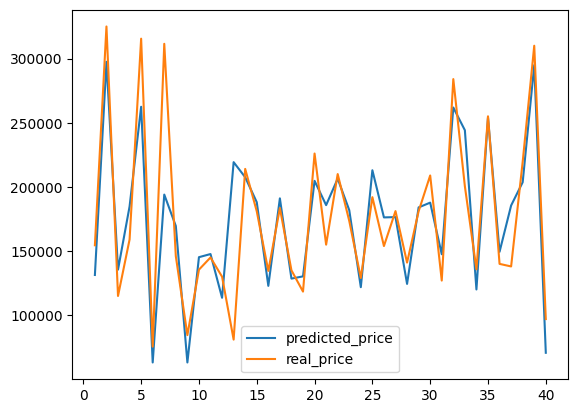

In [49]:
# 그래프 그리기
plt.plot(dt.index, pred_price, label='predicted_price')
plt.plot(dt.index, real_price, label='real_price')

plt.legend(loc='best')
plt.show()


In [50]:
dt.columns

Index(['real_price', 'pred_price'], dtype='object')

In [52]:
#실제가격과 예측가격의 오차
diff = dt['real_price'] - dt['pred_price']
dt['price error'] = diff
dt.head()

,real_price,pred_price,price error
1,154500.0,131351.000000,23149.000000
2,325000.0,297469.593750,27530.406250
3,115000.0,135514.250000,-20514.250000
4,159000.0,184759.390625,-25759.390625
5,315500.0,262437.562500,53062.437500
